In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
wine = pd.read_csv('wine_sample.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,10.0,0.46,0.44,2.9,0.065,4.0,8,0.99674,3.33,0.62,12.2,6,red
1,9.5,0.57,0.27,2.3,0.082,23.0,144,0.99782,3.27,0.55,9.4,5,red
2,7.3,0.91,0.10,1.8,0.074,20.0,56,0.99672,3.35,0.56,9.2,5,red
3,8.2,0.23,0.42,1.9,0.069,9.0,17,0.99376,3.21,0.54,12.3,6,red
4,7.9,0.37,0.23,1.8,0.077,23.0,49,0.99630,3.28,0.67,9.3,5,red


In [3]:
X = wine[['density', 'alcohol']]
y = wine[['type']]

# Scale the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
# Initialize k-nearest neighbors
knnModel = KNeighborsClassifier(n_neighbors=5)

# Fit k-nearest neighbors with 5-fold cross-validation
cv_results = cross_validate(knnModel, X, np.ravel(y), cv=5)

In [5]:
# View testing accuracy for each fold
print('Test score:', cv_results['test_score'])

Test score: [0.825 0.725 0.725 0.775 0.775]


Text(64.72222222222221, 0.5, 'Count')

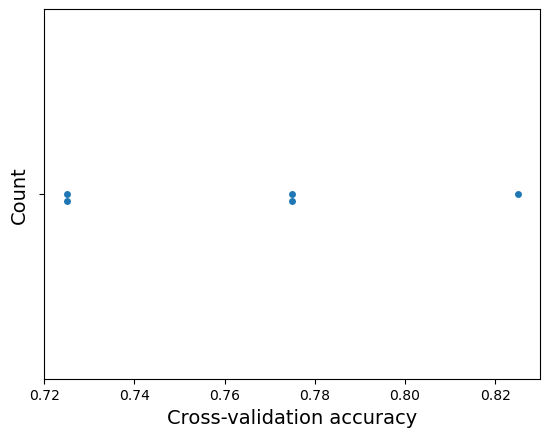

In [6]:
# Plot accuracy for each fold
scores = cv_results['test_score']

p = sns.swarmplot(x=scores)
p.set_xlabel('Cross-validation accuracy', fontsize=14)
p.set_ylabel('Count', fontsize=14)